In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [20]:
df = pd.read_csv('/content/monthly-beer-production-in-austr.csv')


In [21]:
df.head(15)

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9
5,1956-06,64.8
6,1956-07,70.1
7,1956-08,77.3
8,1956-09,79.5
9,1956-10,100.6


In [22]:
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

data = df['Monthly beer production'].values
data = data.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(x), np.array(y)

seq_length = 12
x_train, y_train = create_sequences(scaled_data, seq_length)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))




In [23]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, epochs=20, batch_size=32)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.2072
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0275
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0231
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0201
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0176
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0190
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0171
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0174
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0163
Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0161
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0150
Epoch 12/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0156
Epoch 13/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0148
Epoch 14/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0156
Epoch 15/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0136
Epoch 16/20
15/

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


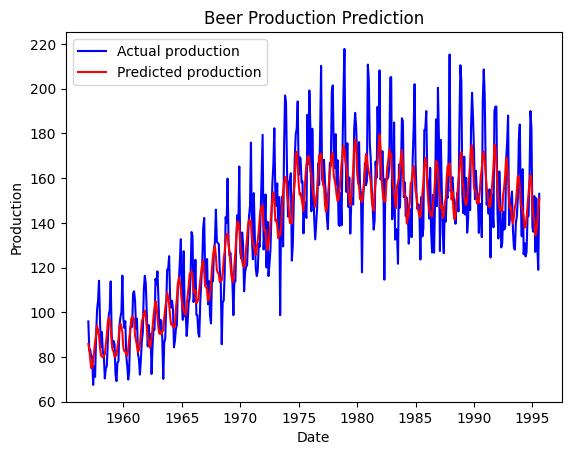

In [24]:
predicted_values = model.predict(x_train)

predicted_values = scaler.inverse_transform(predicted_values)

plt.plot(df.index[seq_length:], df['Monthly beer production'][seq_length:], color='blue', label='Actual production')
plt.plot(df.index[seq_length:], predicted_values, color='red', label='Predicted production')
plt.title('Beer Production Prediction')
plt.xlabel('Date')
plt.ylabel('Production')
plt.legend()
plt.show()
